# __1) Load Dataset__ 

In [278]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import *
from scipy import stats

# global settings
pd.set_option('display.max_columns', None)

In [279]:
col_name = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R', 'Class'
]

col_name_noclass = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R'
]

df_dataset_b = pd.read_csv('dataset_new/df_median_b',
                           header='infer',
                           index_col=[0],
                           sep='\t')

df_dataset_d = pd.read_csv('dataset_new/df_median_d',
                           header='infer',
                           index_col=[0],
                           sep='\t')

df_dataset_b = df_dataset_b.reset_index(drop=True)
df_dataset_d = df_dataset_d.reset_index(drop=True)


In [280]:
print("dataset b shape: "+str(df_dataset_b.shape))
df_dataset_b.head()

dataset b shape: (58, 52)


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,1486.38217,1485.37206,1484.98900,1485.15322,5260.65556,5067.58889,4977.82222,4984.07778,5170.31111,5200.20556,4111.52778,4291.85000,9.03894,4.42683,4.50456,9.24122,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,1486.25922,1485.25033,1484.86706,1485.03072,5256.22778,5065.40000,4978.02222,4981.43333,5172.34444,5200.81667,4107.14444,4286.32778,9.03017,4.28400,4.59750,9.16644,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,1486.28822,1485.28100,1484.89889,1485.06111,5278.55000,5002.90000,4971.04444,4958.05556,5146.37778,5179.37222,4039.27222,4302.88333,9.78072,4.61200,4.54478,10.23117,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,1486.35717,1485.35044,1484.97017,1485.13128,5276.14444,4994.79444,4973.30556,4956.30556,5149.92222,5175.68889,4036.35556,4297.37778,9.74939,4.83533,4.74928,10.94506,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,1486.32844,1485.32050,1484.94433,1485.10328,5272.71667,4993.56111,4969.87778,4952.24444,5147.42222,5174.01111,4035.33889,4297.57222,9.60233,4.47989,4.71683,9.98406,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


In [281]:
print("dataset d shape: "+str(df_dataset_d.shape))
df_dataset_d.head()

dataset d shape: (151, 44)


,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.10471,1.00468,0.99478,2.34583,2.60444,2.58000,2.34722,1485.80556,1485.93056,1485.94167,1485.78056,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3543.97222,3457.94444,3367.58333,3401.80556,3711.22222,3707.13889,3643.55556,3590.77778,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.15000,123.91194,151.61583,151.27500,151.55944,151.22111,124.25361,124.01778,1
1,1.08940,0.99778,0.99801,3.39944,3.71111,3.71194,3.41444,1486.16389,1486.30278,1486.30278,1486.13056,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3546.80556,3412.58333,3256.66667,3322.27778,3716.05556,3670.77778,3622.22222,3580.30556,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.17194,123.83167,151.65222,151.16444,151.59528,151.11333,124.27417,123.93778,1
2,1.07967,1.00606,0.99903,3.43806,3.71472,3.68972,3.42000,1486.32222,1486.45278,1486.45556,1486.29722,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3557.27778,3413.33333,3267.00000,3330.72222,3693.66667,3677.58333,3620.02778,3574.08333,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.16000,123.81806,151.63611,151.15083,151.58000,151.09694,124.26083,123.92361,1
3,1.09083,1.01319,0.99491,3.39944,3.72500,3.66056,3.37111,1486.45556,1486.57500,1486.58333,1486.41667,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3541.11111,3433.66667,3262.00000,3329.61111,3702.05556,3677.19444,3635.02778,3579.69444,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.14472,123.80861,151.62250,151.13917,151.56417,151.08417,124.25083,123.91306,1
4,1.09382,1.00972,1.00362,3.39889,3.70278,3.68139,3.35194,1486.60000,1486.72500,1486.73056,1486.55556,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3541.33333,3416.88889,3273.47222,3320.83333,3690.13889,3690.50000,3615.83333,3564.97222,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.13444,123.79750,151.60750,151.12278,151.55028,151.06889,124.23611,123.90306,1


# __2) Merge B into D__ 
Drop these columns to allow meter b to merge into d with same rows and columns 
- Swirl angle
- Average flow velocity in all four paths
- Average Speed of Sound
- Turbulence in each of the four paths 
- Meter performance

In [282]:
# drop col from b 
C_D = df_dataset_b.drop(['Swirl Angle'],axis=1)
C_D = C_D.drop(['Average Flow Velocity'],axis=1)
C_D = C_D.drop(['Average Speed of Sound'],axis=1)
C_D = C_D.drop(['Turbulence P1'],axis=1)
C_D = C_D.drop(['Turbulence P2'],axis=1)
C_D = C_D.drop(['Turbulence P3'],axis=1)
C_D = C_D.drop(['Turbulence P4'],axis=1)
C_D = C_D.drop(['Meter Performance'],axis=1)

In [283]:
C_D.shape

(58, 44)

In [284]:
# merge b into d
df_merge = df_dataset_d.append(C_D)
df_merge =df_merge.reset_index(drop=True)
print("dataset merge shape: "+str(df_merge.shape))
df_merge

dataset merge shape: (209, 44)


,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.10471,1.00468,0.99478,2.34583,2.60444,2.58000,2.34722,1485.80556,1485.93056,1485.94167,1485.78056,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3543.97222,3457.94444,3367.58333,3401.80556,3711.22222,3707.13889,3643.55556,3590.77778,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.15000,123.91194,151.61583,151.27500,151.55944,151.22111,124.25361,124.01778,1
1,1.08940,0.99778,0.99801,3.39944,3.71111,3.71194,3.41444,1486.16389,1486.30278,1486.30278,1486.13056,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3546.80556,3412.58333,3256.66667,3322.27778,3716.05556,3670.77778,3622.22222,3580.30556,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.17194,123.83167,151.65222,151.16444,151.59528,151.11333,124.27417,123.93778,1
2,1.07967,1.00606,0.99903,3.43806,3.71472,3.68972,3.42000,1486.32222,1486.45278,1486.45556,1486.29722,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3557.27778,3413.33333,3267.00000,3330.72222,3693.66667,3677.58333,3620.02778,3574.08333,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.16000,123.81806,151.63611,151.15083,151.58000,151.09694,124.26083,123.92361,1
3,1.09083,1.01319,0.99491,3.39944,3.72500,3.66056,3.37111,1486.45556,1486.57500,1486.58333,1486.41667,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3541.11111,3433.66667,3262.00000,3329.61111,3702.05556,3677.19444,3635.02778,3579.69444,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.14472,123.80861,151.62250,151.13917,151.56417,151.08417,124.25083,123.91306,1
4,1.09382,1.00972,1.00362,3.39889,3.70278,3.68139,3.35194,1486.60000,1486.72500,1486.73056,1486.55556,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3541.33333,3416.88889,3273.47222,3320.83333,3690.13889,3690.50000,3615.83333,3564.97222,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.13444,123.79750,151.60750,151.12278,151.55028,151.06889,124.23611,123.90306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.22315,1.14886,1.04576,5.94383,6.87799,6.31682,4.85865,1484.06111,1486.57167,1502.18750,1550.16567,5397.02222,4948.59444,4925.23889,4871.76111,5239.60000,4876.10000,1099.10406,1660.01061,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,78.75000,84.48889,52.30000,52.30000,52.90000,52.90000,68.50000,68.50000,80.50000,80.50000,84.18594,83.90364,120.49082,119.96408,119.16779,118.69224,80.54248,80.33620,3
205,1.22854,1.14717,1.04744,5.93703,6.87081,6.32556,4.82948,1483.85833,1486.36478,1502.06322,1549.99539,5406.76111,4955.97778,4930.27778,4874.67222,5383.48333,5015.51111,1125.29039,1648.64094,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,75.65556,82.48333,52.30000,52.30000,52.90000,52.90000,68.50000,68.50000,80.50000,80.50000,84.19728,83.91521,120.50726,119.98112,119.17797,118.70181,80.55100,80.34573,3
206,1.22914,1.15319,1.05300,5.95431,6.86756,6.33645,4.86741,1483.83783,1486.34667,1502.07228,1549.98122,5408.65556,4956.20000,4930.81111,4873.90000,5488.05000,5108.20000,1174.45635,1662.04461,100.00000,100.00000,100.00000,100.000

# __3) Count Merge dataset labels__ 


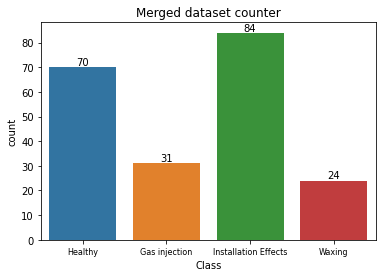

In [285]:
ax = sns.countplot(x=df_merge['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection', 'Installation Effects','Waxing'], fontsize=8) 
plt.title('Merged dataset counter')
plt.show()

# __4) Reduce Dimension with Principal Componenent Analysis (PCA)__
Principal component analysis (PCA) is a classical method for reducing the number of 
attributes in the data by projecting the data from its original high-dimensional space 
into a lower-dimensional space. The new attributes (also known as components) created by 
PCA have the following properties: 

(1) they are linear combinations of the original attributes, 

(2) they are orthogonal (perpendicular) to each other 

(3) they capture the maximum amount of variation in the data.  

## Standardize data
- PCA performs best with a standardized feature set. We will perform standard scalar normalization to normalize on our feature set. 
- Standard scaleer will transform mean to 0 and standard deviation to 1. Less sensitive to outlier. 

In [286]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# save dataset merge
dataset = df_merge
dataset.to_csv('dataset_new/df_merge', sep='\t')

# split between X and Y
X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

# normalize data
scaler = StandardScaler()
X=scaler.fit_transform(X)


## Store projected values of into a dataframe called projected
- Display PCA values 

In [287]:
pca = PCA(.95)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (209, 43)
transformed shape: (209, 5)


In [288]:
df_pca = pd.DataFrame(abs(pca.components_),columns=col_name_noclass)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5'])

projected = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4','PC5']) 
projected.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.69867,-0.27284,2.43183,0.96861,-0.46070
1,-3.67439,-0.48569,1.34185,0.94708,-0.24432
2,-3.66895,-0.46736,1.32420,1.00787,-0.23231
3,-3.66481,-0.42954,1.33915,1.05455,-0.22127
4,-3.65249,-0.39701,1.33243,1.10652,-0.20395


In [289]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R
PC1,0.01032,0.00389,0.00863,0.01759,0.00564,0.00945,0.01976,0.03112,0.06541,0.06210,0.05395,0.17571,0.17608,0.17835,0.17844,0.17916,0.17904,0.14423,0.15421,0.18005,0.17971,0.17895,0.17849,0.18050,0.18031,0.17236,0.17296,0.17542,0.17542,0.17890,0.17888,0.17558,0.17560,0.16240,0.16240,0.17997,0.17998,0.17996,0.17998,0.18013,0.18014,0.18056,0.17993
PC2,0.42443,0.43235,0.42878,0.02750,0.03699,0.04293,0.33191,0.12144,0.13910,0.15940,0.37682,0.03941,0.03872,0.04200,0.04214,0.04416,0.04568,0.08557,0.08320,0.03178,0.03482,0.05364,0.05538,0.00138,0.00545,0.12347,0.11588,0.01039,0.01039,0.01238,0.01240,0.02283,0.02285,0.17059,0.17057,0.04399,0.04433,0.04512,0.04584,0.04225,0.04304,0.01148,0.01174
PC3,0.02397,0.05016,0.04443,0.51583,0.51749,0.51371,0.33394,0.16555,0.04387,0.12895,0.07362,0.03158,0.02337,0.00566,0.00338,0.01323,0.01633,0.11486,0.08965,0.00518,0.00254,0.00111,0.01360,0.01041,0.01011,0.01173,0.01082,0.00799,0.00799,0.01781,0.01782,0.04351,0.04345,0.05178,0.05181,0.01162,0.00731,0.01164,0.00375,0.00866,0.00072,0.00045,0.00158
PC4,0.17680,0.10502,0.13477,0.06885,0.08239,0.10100,0.03178,0.35625,0.59442,0.56591,0.10565,0.02856,0.02867,0.04013,0.03961,0.02494,0.03299,0.00017,0.00871,0.01570,0.02714,0.05619,0.06339,0.01832,0.01506,0.07880,0.07719,0.09937,0.09937,0.04651,0.04646,0.12580,0.12585,0.08110,0.08115,0.02672,0.02751,0.02462,0.02525,0.01663,0.01819,0.04330,0.05963
PC5,0.17611,0.12931,0.14758,0.11817,0.10546,0.12147,0.01203,0.47054,0.32035,0.02315,0.25587,0.17358,0.17366,0.10997,0.10679,0.05422,0.04590,0.44885,0.38537,0.00204,0.00295,0.01080,0.02517,0.01236,0.01371,0.05331,0.04913,0.07500,0.07500,0.03041,0.03041,0.00789,0.00793,0.13656,0.13658,0.00414,0.00169,0.01662,0.01241,0.02092,0.01779,0.03992,0.04430


### Plot Cummulative variances with individual variance
- add as many pc components possible closest to 100%

Result: 5 PC components is sufficent to represent the entire variance of the data of 95% of data.

Explained variance ratio: [30.55587982  5.04849043  3.63611739  1.54492808  0.94599046]
Total cummulative sum: 41.731406187411615


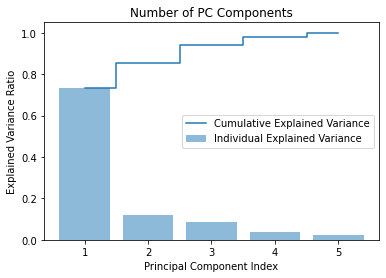

In [290]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(f"Explained variance ratio: {pca.explained_variance_}")
print(f"Total cummulative sum: {tot}")
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,6), var_exp, alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,6), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Number of PC Components')
plt.legend(loc='best')
plt.show()

## Plot explained variance ratio
- The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

Text(0, 0.5, 'Cumulative Varience')

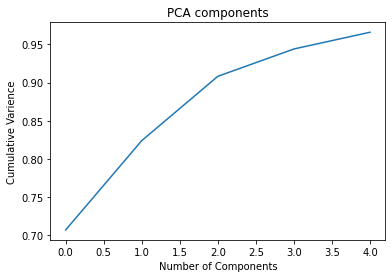

In [291]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

## Plot original data without PCA
- Class 1 to 3 overlap with each other while class 4 is seperated  

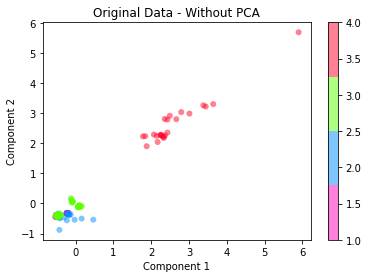

In [292]:
plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 4))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data - Without PCA')
plt.colorbar()

## Plot original data with PCA
- able to view all classes clearly

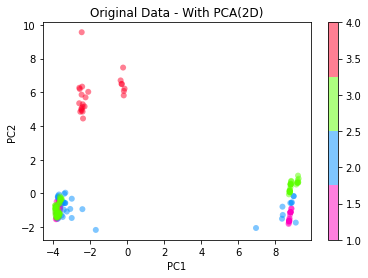

In [293]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 4))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Original Data - With PCA(2D)')
plt.colorbar()

Plot original data with PCA 3 Dimension

/var/folders/7x/1p6my40n6kb5znc18rklfy9h0000gn/T/ipykernel_11693/4224531631.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(12,9)).gca(projection='3d')


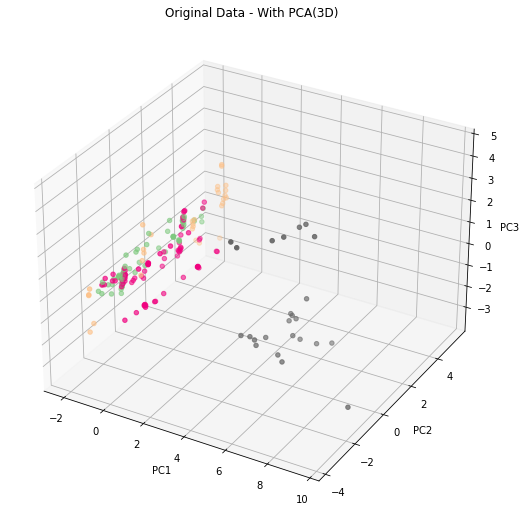

In [294]:
fig = plt.figure(figsize=(12,9)).gca(projection='3d')
fig.scatter(X_pca[:, 1], X_pca[:, 2],X_pca[:, 3],cmap=plt.cm.get_cmap('Accent', 4),c=Y)
plt.title('Original Data - With PCA(3D)')
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

# __5) Feature Importance - PCA__
 
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).

All Results

In [295]:
df_pca = pd.DataFrame(abs(pca.components_), columns=col_name_noclass)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R
PC1,0.01032,0.00389,0.00863,0.01759,0.00564,0.00945,0.01976,0.03112,0.06541,0.06210,0.05395,0.17571,0.17608,0.17835,0.17844,0.17916,0.17904,0.14423,0.15421,0.18005,0.17971,0.17895,0.17849,0.18050,0.18031,0.17236,0.17296,0.17542,0.17542,0.17890,0.17888,0.17558,0.17560,0.16240,0.16240,0.17997,0.17998,0.17996,0.17998,0.18013,0.18014,0.18056,0.17993
PC2,0.42443,0.43235,0.42878,0.02750,0.03699,0.04293,0.33191,0.12144,0.13910,0.15940,0.37682,0.03941,0.03872,0.04200,0.04214,0.04416,0.04568,0.08557,0.08320,0.03178,0.03482,0.05364,0.05538,0.00138,0.00545,0.12347,0.11588,0.01039,0.01039,0.01238,0.01240,0.02283,0.02285,0.17059,0.17057,0.04399,0.04433,0.04512,0.04584,0.04225,0.04304,0.01148,0.01174
PC3,0.02397,0.05016,0.04443,0.51583,0.51749,0.51371,0.33394,0.16555,0.04387,0.12895,0.07362,0.03158,0.02337,0.00566,0.00338,0.01323,0.01633,0.11486,0.08965,0.00518,0.00254,0.00111,0.01360,0.01041,0.01011,0.01173,0.01082,0.00799,0.00799,0.01781,0.01782,0.04351,0.04345,0.05178,0.05181,0.01162,0.00731,0.01164,0.00375,0.00866,0.00072,0.00045,0.00158
PC4,0.17680,0.10502,0.13477,0.06885,0.08239,0.10100,0.03178,0.35625,0.59442,0.56591,0.10565,0.02856,0.02867,0.04013,0.03961,0.02494,0.03299,0.00017,0.00871,0.01570,0.02714,0.05619,0.06339,0.01832,0.01506,0.07880,0.07719,0.09937,0.09937,0.04651,0.04646,0.12580,0.12585,0.08110,0.08115,0.02672,0.02751,0.02462,0.02525,0.01663,0.01819,0.04330,0.05963
PC5,0.17611,0.12931,0.14758,0.11817,0.10546,0.12147,0.01203,0.47054,0.32035,0.02315,0.25587,0.17358,0.17366,0.10997,0.10679,0.05422,0.04590,0.44885,0.38537,0.00204,0.00295,0.01080,0.02517,0.01236,0.01371,0.05331,0.04913,0.07500,0.07500,0.03041,0.03041,0.00789,0.00793,0.13656,0.13658,0.00414,0.00169,0.01662,0.01241,0.02092,0.01779,0.03992,0.04430


## Individual PC Results

PC1

In [296]:
df_pc1 =df_pca.iloc[[0]]
a = abs(pca.components_[0])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc1 = pd.DataFrame(values,columns=columns)
df_pc1

,Transit Time P4T,Signal Quality P3T,Signal Quality P3R,Transit Time P3R,Transit Time P3T,Signal Quality P1T,Transit Time P1R,Transit Time P2R,Transit Time P1T,Transit Time P2T,Transit Time P4R,Signal Quality P1R,Signal Strength P3T,Signal Strength P3R,Signal Quality P2T,Gain P2T,Gain P2R,Signal Quality P2R,Signal Strength P2R,Signal Strength P2T,Signal Strength P1R,Signal Strength P1T,Gain P3R,Gain P3T,Gain P1T,Gain P1R,Signal Quality P4R,Signal Quality P4T,Gain P4T,Gain P4R,Signal Strength P4R,Signal Strength P4T,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Speed of Sound P1,Flow Velocity P4,Flow Velocity P1,Profile factor,Flow Velocity P3,Crossflow,Flow Velocity P2,Symmetry
0,0.18056,0.18050,0.18031,0.18014,0.18013,0.18005,0.17998,0.17998,0.17997,0.17996,0.17993,0.17971,0.17916,0.17904,0.17895,0.17890,0.17888,0.17849,0.17844,0.17835,0.17608,0.17571,0.17560,0.17558,0.17542,0.17542,0.17296,0.17236,0.16240,0.16240,0.15421,0.14423,0.06541,0.06210,0.05395,0.03112,0.01976,0.01759,0.01032,0.00945,0.00863,0.00564,0.00389


PC2

In [297]:
df_pc2 =df_pca.iloc[[1]]
a = abs(pca.components_[1])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc2 = pd.DataFrame(values,columns=columns)
df_pc2

,Symmetry,Crossflow,Profile factor,Speed of Sound P4,Flow Velocity P4,Gain P4T,Gain P4R,Speed of Sound P3,Speed of Sound P2,Signal Quality P4T,Speed of Sound P1,Signal Quality P4R,Signal Strength P4T,Signal Strength P4R,Signal Quality P2R,Signal Quality P2T,Transit Time P2R,Signal Strength P3R,Transit Time P2T,Transit Time P1R,Signal Strength P3T,Transit Time P1T,Transit Time P3R,Flow Velocity P3,Transit Time P3T,Signal Strength P2R,Signal Strength P2T,Signal Strength P1T,Signal Strength P1R,Flow Velocity P2,Signal Quality P1R,Signal Quality P1T,Flow Velocity P1,Gain P3R,Gain P3T,Gain P2R,Gain P2T,Transit Time P4R,Transit Time P4T,Gain P1T,Gain P1R,Signal Quality P3R,Signal Quality P3T
0,0.43235,0.42878,0.42443,0.37682,0.33191,0.17059,0.17057,0.15940,0.13910,0.12347,0.12144,0.11588,0.08557,0.08320,0.05538,0.05364,0.04584,0.04568,0.04512,0.04433,0.04416,0.04399,0.04304,0.04293,0.04225,0.04214,0.04200,0.03941,0.03872,0.03699,0.03482,0.03178,0.02750,0.02285,0.02283,0.01240,0.01238,0.01174,0.01148,0.01039,0.01039,0.00545,0.00138


PC3

In [298]:
df_pc3 =df_pca.iloc[[2]]
a = abs(pca.components_[2])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc3 = pd.DataFrame(values,columns=columns)
df_pc3

,Flow Velocity P2,Flow Velocity P1,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P3,Signal Strength P4T,Signal Strength P4R,Speed of Sound P4,Gain P4R,Gain P4T,Symmetry,Crossflow,Speed of Sound P2,Gain P3T,Gain P3R,Signal Strength P1T,Profile factor,Signal Strength P1R,Gain P2R,Gain P2T,Signal Strength P3R,Signal Quality P2R,Signal Strength P3T,Signal Quality P4T,Transit Time P2T,Transit Time P1T,Signal Quality P4R,Signal Quality P3T,Signal Quality P3R,Transit Time P3T,Gain P1T,Gain P1R,Transit Time P1R,Signal Strength P2T,Signal Quality P1T,Transit Time P2R,Signal Strength P2R,Signal Quality P1R,Transit Time P4R,Signal Quality P2T,Transit Time P3R,Transit Time P4T
0,0.51749,0.51583,0.51371,0.33394,0.16555,0.12895,0.11486,0.08965,0.07362,0.05181,0.05178,0.05016,0.04443,0.04387,0.04351,0.04345,0.03158,0.02397,0.02337,0.01782,0.01781,0.01633,0.01360,0.01323,0.01173,0.01164,0.01162,0.01082,0.01041,0.01011,0.00866,0.00799,0.00799,0.00731,0.00566,0.00518,0.00375,0.00338,0.00254,0.00158,0.00111,0.00072,0.00045


PC4

In [299]:
df_pc4 =df_pca.iloc[[3]]
a = abs(pca.components_[3])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc4 = pd.DataFrame(values,columns=columns)
df_pc4

,Speed of Sound P2,Speed of Sound P3,Speed of Sound P1,Profile factor,Crossflow,Gain P3R,Gain P3T,Speed of Sound P4,Symmetry,Flow Velocity P3,Gain P1T,Gain P1R,Flow Velocity P2,Gain P4R,Gain P4T,Signal Quality P4T,Signal Quality P4R,Flow Velocity P1,Signal Quality P2R,Transit Time P4R,Signal Quality P2T,Gain P2T,Gain P2R,Transit Time P4T,Signal Strength P2T,Signal Strength P2R,Signal Strength P3R,Flow Velocity P4,Signal Strength P1R,Signal Strength P1T,Transit Time P1R,Signal Quality P1R,Transit Time P1T,Transit Time P2R,Signal Strength P3T,Transit Time P2T,Signal Quality P3T,Transit Time P3R,Transit Time P3T,Signal Quality P1T,Signal Quality P3R,Signal Strength P4R,Signal Strength P4T
0,0.59442,0.56591,0.35625,0.17680,0.13477,0.12585,0.12580,0.10565,0.10502,0.10100,0.09937,0.09937,0.08239,0.08115,0.08110,0.07880,0.07719,0.06885,0.06339,0.05963,0.05619,0.04651,0.04646,0.04330,0.04013,0.03961,0.03299,0.03178,0.02867,0.02856,0.02751,0.02714,0.02672,0.02525,0.02494,0.02462,0.01832,0.01819,0.01663,0.01570,0.01506,0.00871,0.00017


PC5

In [300]:
df_pc5 =df_pca.iloc[[4]]
a = abs(pca.components_[4])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc5 = pd.DataFrame(values,columns=columns)
df_pc5

,Speed of Sound P1,Signal Strength P4T,Signal Strength P4R,Speed of Sound P2,Speed of Sound P4,Profile factor,Signal Strength P1R,Signal Strength P1T,Crossflow,Gain P4R,Gain P4T,Symmetry,Flow Velocity P3,Flow Velocity P1,Signal Strength P2T,Signal Strength P2R,Flow Velocity P2,Gain P1T,Gain P1R,Signal Strength P3T,Signal Quality P4T,Signal Quality P4R,Signal Strength P3R,Transit Time P4R,Transit Time P4T,Gain P2R,Gain P2T,Signal Quality P2R,Speed of Sound P3,Transit Time P3T,Transit Time P3R,Transit Time P2T,Signal Quality P3R,Transit Time P2R,Signal Quality P3T,Flow Velocity P4,Signal Quality P2T,Gain P3R,Gain P3T,Transit Time P1T,Signal Quality P1R,Signal Quality P1T,Transit Time P1R
0,0.47054,0.44885,0.38537,0.32035,0.25587,0.17611,0.17366,0.17358,0.14758,0.13658,0.13656,0.12931,0.12147,0.11817,0.10997,0.10679,0.10546,0.07500,0.07500,0.05422,0.05331,0.04913,0.04590,0.04430,0.03992,0.03041,0.03041,0.02517,0.02315,0.02092,0.01779,0.01662,0.01371,0.01241,0.01236,0.01203,0.01080,0.00793,0.00789,0.00414,0.00295,0.00204,0.00169


## Biplots

PC1 and PC2

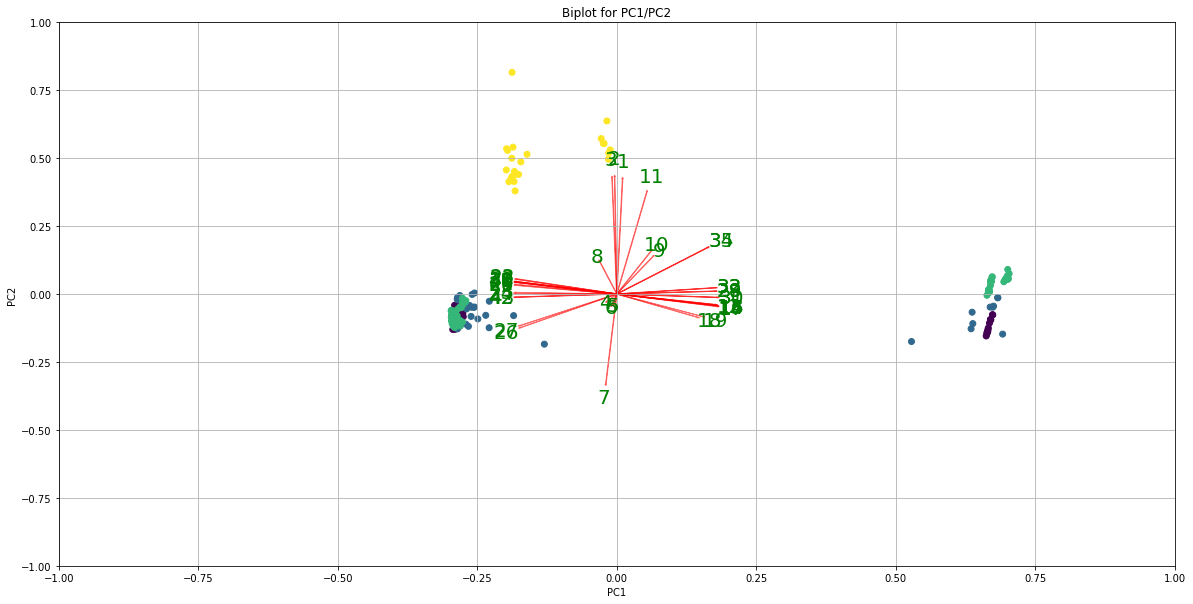

In [301]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y= dataset['Class']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1),fontsize=20, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC1/PC2')
plt.xlabel("PC1".format(1))
plt.ylabel("PC2".format(2))
plt.show()

PC3 and PC4

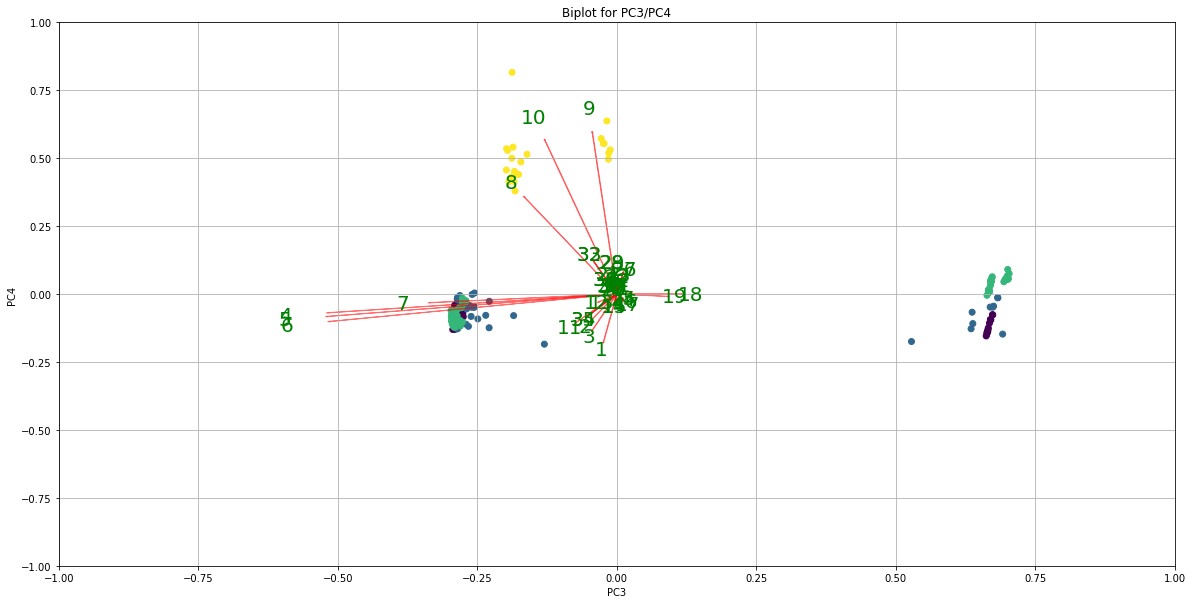

In [302]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[2:4, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC3/PC4')
plt.xlabel("PC3".format(1))
plt.ylabel("PC4".format(2))
plt.show()

# __Data Mining__ 
To perform data mining, we would first visualise our dataset, from our visualisation, we will get our speculation, which we then use data mining to prove our speculation. An example would be our PCA scatter plot, with dense data points, KNN algorithm would perform well to a certain extent but exceeding that point, it would result in a decrease in performance which was shown in our graph.

## __1) Split Dataset 70/30__
The team decided to split our dataset using a 70:30 ratio, from the research we have done, 80:20 ratio is typically used for large datasets numbering in the thousands or higher but our datasets only consists of hundreds so changing the train to test ratio, we would be able to balance out our outliers if they still exist in our dataset.

In [303]:
from sklearn.model_selection import train_test_split

# use this as main model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform pca on dataset 
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)




## __2) Supervised Learning__
Supervised learning is a machine learning approach that is defined by the use of labelled datasets. As a result, by using labelled inputs, the model can measure its own accuracy and predict outcome accuracy through learning new data over time.

Includes:
- Logistic Regression
- Linear Support Vector Machine
- Non-Linear Support Vector Machine
- Decision Tree
- Neural Network
- Naives Bayes
- Linear Discriminant 


### Linear Prediction using Logistics Regression 
Logistic regression estimates the probability of an event occurring based on a given dataset of independent variables. Since outcome is a probability, the dependent variable is bounded between 0 to 1 value.

Explanation: <br>
From the result, both training and testing has an average of 70% accuracy. This could be due to the overlap of the data point as shown in the scatter plot for class 1, 2 and 3.


/Users/kenjileong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kenjileong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Model score: 0.71
Highest training accuracy: 0.71
Highest testing accuracy: 0.71
Lowest testing accuracy: 0.65


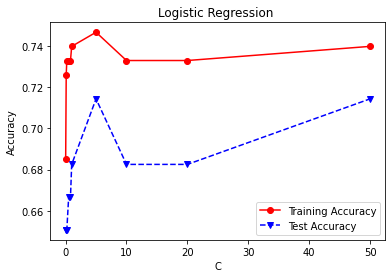

In [304]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression ')

print (f"Model score: {round(clf3.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(LRtestAcc),2))
print("Highest testing accuracy:", round(max(LRtestAcc),2))
print("Lowest testing accuracy:", round(min(LRtestAcc),2))




### Linear Support Vector Machine
The objective of the support vector machine is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The number of hyperplanes will be based on the number of input features.

Explanation: <br>
From the result, both training and testing have an accuracy of 70%, this could be due SVM not being able to cut between these data points from different classes because some of the data points from different classes are clustered together as shown earlier in the 3 dimensional scatter plot result from the merged dataset.

Model score: 0.65
Highest training accuracy: 0.7
Highest testing accuracy: 0.7
Lowest testing accuracy: 0.56


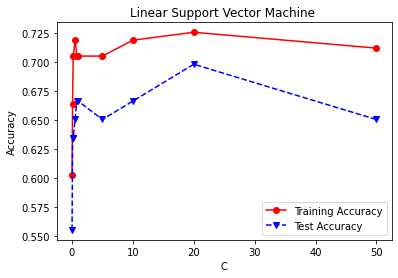

In [305]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear Support Vector Machine ')

print (f"Model score: {round(clf4.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(SVMtestAcc),2))
print("Highest testing accuracy:", round(max(SVMtestAcc),2))
print("Lowest testing accuracy:", round(min(SVMtestAcc),2))



### Non Linear Support Vector Machine(SVM)
Where there are more than three classes, when they are not linearly separable. Non linear support vector machines will be required to classify these data points. 

Explanation: <br>
From the result, both training and testing have an accuracy of 0.84 and it is higher than linear SVM with accuracy 0.7. This could be due to data points overlapping with each. Hence, a straight may not be the most optimal choice to split the data linearly where other shapes such as a circle could be implemented instead.

Model score: 0.84
Highest training accuracy: 0.84
Highest testing accuracy: 0.84
Lowest testing accuracy: 0.46


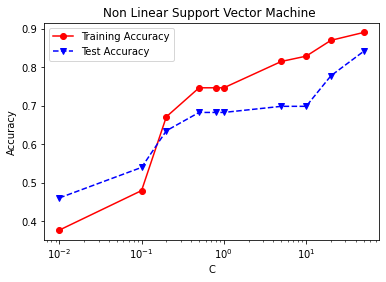

In [306]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(X_train, y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Non Linear Support Vector Machine ')

print (f"Model score: {round(clf5.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(SVMtestAcc),2))
print("Highest testing accuracy:", round(max(SVMtestAcc),2))
print("Lowest testing accuracy:", round(min(SVMtestAcc),2))

### Decision Tree
A decision tree is similar to a flowchart where each internal nodes denotes a test on an attribute where each branch represents an outcome of the test and each leaf nodes contains a class label.

Explanation: <br>
From the result, training accuracy is 1 while testing accuracy is 0.81. This could be due to the increased depth of the tree as it has a depth of 4 and root node of flow velocity P4. 

However, only class 2, 3 and 4 has an entropy of 0 while class 1 and 3 has an entropy of 0.99. Hence, this will affect the model score and the testing accuracy of the decision tree.



Model score: 0.81
Highest training accuracy: 1.0
Highest testing accuracy: 0.81
Lowest testing accuracy: 0.46


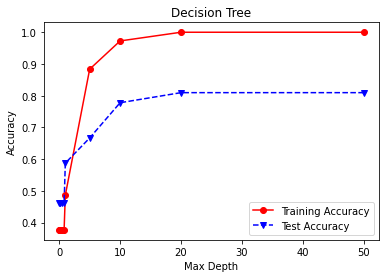

In [307]:
from sklearn.tree import DecisionTreeClassifier

clf7 = DecisionTreeClassifier(max_depth=10)
maxdepth = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in C:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(X_train, y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, dt_trainAcc, 'ro-', C, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')

print (f"Model score: {round(clf7.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(dt_trainAcc),2))
print("Highest testing accuracy:", round(max(dt_testAcc),2))
print("Lowest testing accuracy:", round(min(dt_testAcc),2))

In [308]:
Y = dataset['Class']
X = dataset.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=59)
clf = clf.fit(X, Y)

[Text(0.5, 0.875, 'Flow Velocity P4 <= 1.541\nentropy = 1.824\nsamples = 209\nvalue = [70, 31, 84, 24]\nclass = 3'),
 Text(0.25, 0.625, 'Flow Velocity P2 <= 1.996\nentropy = 0.935\nsamples = 37\nvalue = [0, 13, 0, 24]\nclass = 4'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0]\nclass = 2'),
 Text(0.375, 0.375, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24]\nclass = 4'),
 Text(0.75, 0.625, 'Gain P4T <= 66.061\nentropy = 1.374\nsamples = 172\nvalue = [70, 18, 84, 0]\nclass = 3'),
 Text(0.625, 0.375, 'Gain P3T <= 1.6\nentropy = 1.411\nsamples = 143\nvalue = [70, 18, 55, 0]\nclass = 1'),
 Text(0.5, 0.125, 'entropy = 0.999\nsamples = 106\nvalue = [51, 0, 55, 0]\nclass = 3'),
 Text(0.75, 0.125, 'entropy = 0.999\nsamples = 37\nvalue = [19, 18, 0, 0]\nclass = 1'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29, 0]\nclass = 3')]

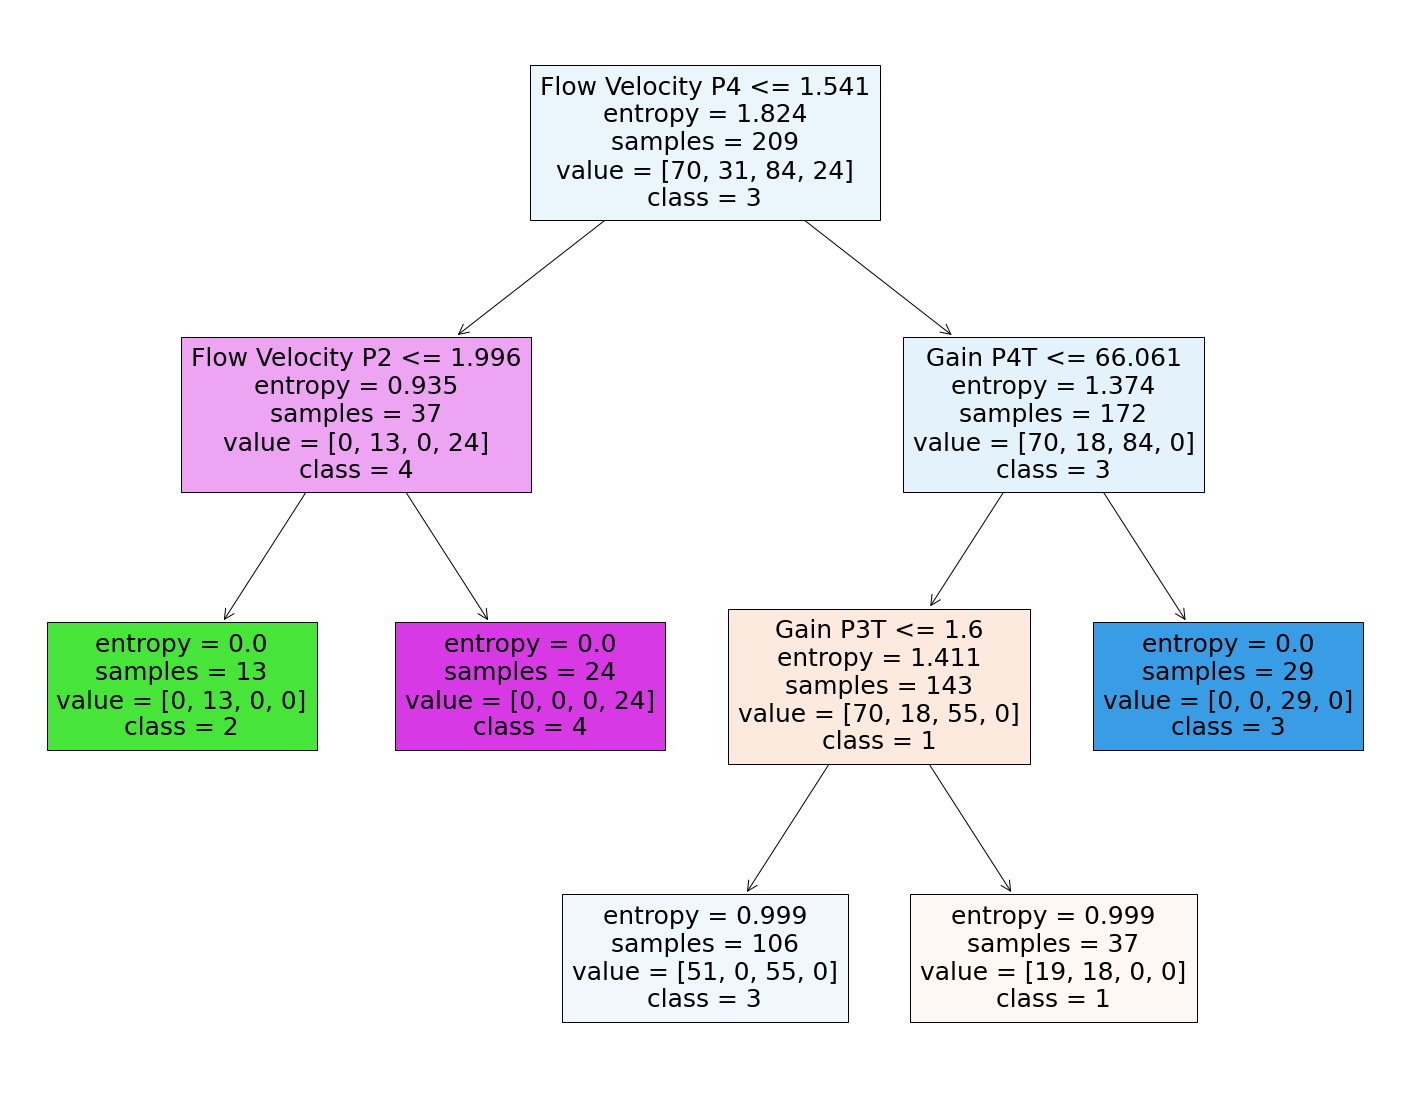

In [309]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=['1','2','3','4'],filled=True, impurity=True)

### Neural Network
Artificial neural networks (ANN) are composed of a node layer, containing an input layer, one or more hidden layers and an output layer.

Explanation: <br>
From the result, training and testing have an accuracy of 0.96 and 0.79 respectively. 

From the graph, as the number of neurons increases, the accuracy from the training result also increases. This is due to the addition of neurons which will add more complexity to the training model. 

Hence, when a new unseen from the testing set enters, it will be able to predict the label accurately. 


Model score: 0.76
Highest training accuracy: 0.96
Highest testing accuracy: 0.79
Lowest testing accuracy: 0.73


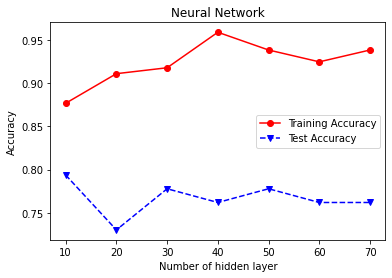

In [310]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=10000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
plt.title('Neural Network')

print (f"Model score: {round(clf6.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(trainAcc),2))
print("Highest testing accuracy:", round(max(testAcc),2))
print("Lowest testing accuracy:", round(min(testAcc),2))

### Naive Bayes
Naive Bayes is a classification based that assumes the presence of a feature in class is not related to any feature. Hence, it is used in binary classification problems.

Explanation: <br>
From the result, training and testing accuracy has an average of 0.73 to 0.67 respectively. This is similar to logistic regression and this is due to the data being clustered together. 

Hence, if the probability of one value is 0, it will affect the overall results for both training and testing data.



In [311]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(y_train, Y_predTrain)
testAcc=accuracy_score(y_test, Y_predTest)

print (f"Model score: {round(clf2.score(X_test, y_test),2)}")
print("Training Accuracy:",round(trainAcc,2))
print("Testing Accuracy:",round(testAcc,2))

Model score: 0.67
Training Accuracy: 0.73
Testing Accuracy: 0.67


### Linear Discriminant
Linear Discriminants is a statistical method of dimensionality reduction that provides the highest possible discrimination among various classes.

Explanation: <br>
From the result, it has the lowest training and testing accuracy as compared to the rest of the  Meters. 

This could be due to the poor performance of separation of the class on the straight line, where data points on each class are closely located beside each other.


In [312]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print (f"Model score: {round(lda.score(X_test, y_test),2)}")
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Model score: 0.68
Accuracy of LDA classifier on training set: 0.73
Accuracy of LDA classifier on test set: 0.68


## __3) Anomaly Detection using Random Forest__
Random forest consists of generating multiple random decision trees and the results are concluded through majority voting. Hence, it is less sensitive to changes in the training data.

Confusion matrix is used to measure performance of any machine learning classification problem where depending on the number of classes, it will affect the dimension size of the matrix containing a combination of predicted and actual values.

Explanation: <br>
After merging dataset B and D, the model is able to get most of the prediction correct except for the False negative part, this could mean that the model is unable to correctly predict the values or the method of assessment is incorrect given there is such a large number of false negatives.

Besides, as shown on the accuracy from Meter B and D, since Meter D has a lower accuracy of 0.8 while Meter B has an accuracy 1. This would also affect the average accuracy of the confusion matrix.


In [313]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [314]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


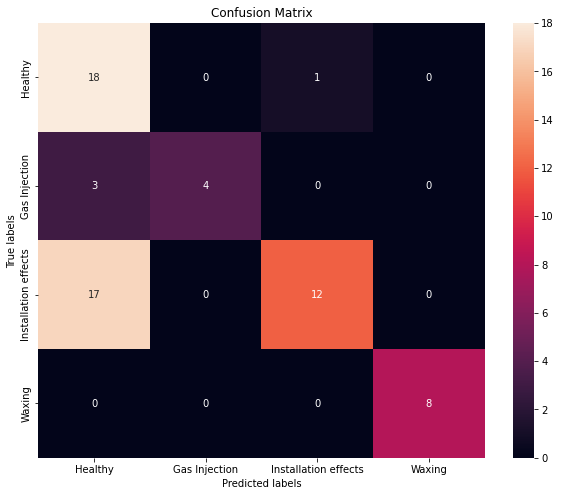

Accuracy : 0.67


In [315]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Healthy', 'Gas Injection','Installation effects','Waxing']) 
ax.yaxis.set_ticklabels(['Healthy', 'Gas Injection','Installation effects','Waxing']) 
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()
print('Accuracy : ' + str(round(accuracy_score(y_test, y_pred),2)))

## __4) Anomaly Detection using Linear Regression(MSE, MAE, RMSE)__
Linear regression fits a straight line across two variables and is used to predict the value of a variable based on the value of another variable. The predicted variable is called the dependent variable while the variable used to predict another variable is called the independent variable. 

Explanation: <br>
From the result, when comparing the results with the meters, it has a low mae, mse and rmse value, which is not accurate because from the confusion matrix it has  low accuracy of 0.66 and it is the lowest compared to the rest of the meters. Therefore, the results are not reliable as compared to confusion matrix.



Display linear regression between PC1 and PC2

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(X_pca)
df.head()

,0,1,2,3,4
0,-3.69867,-0.27284,2.43183,0.96861,-0.46070
1,-3.67439,-0.48569,1.34185,0.94708,-0.24432
2,-3.66895,-0.46736,1.32420,1.00787,-0.23231
3,-3.66481,-0.42954,1.33915,1.05455,-0.22127
4,-3.65249,-0.39701,1.33243,1.10652,-0.20395


In [317]:
XTemp = df[0].values.reshape(-1, 1)
yTemp = df[1].values.reshape(-1, 1)

In [318]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(
        XTemp, yTemp, test_size=0.3, random_state=0)

In [319]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
y_predTemp = regressorTemp.predict(X_testTemp)

In [320]:
print('Mean Absolute Error:',
          round(metrics.mean_absolute_error(y_testTemp, y_predTemp),2))
print('Mean Squared Error:',
        round(metrics.mean_squared_error(y_testTemp, y_predTemp),2))
print('Root Mean Squared Error:',
        round(np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)),2))
        
# get intercept:
print("y intercept: " + str(regressorTemp.intercept_))
# get slope:
print("slope: " + str(regressorTemp.coef_))

Mean Absolute Error: 1.46
Mean Squared Error: 5.12
Root Mean Squared Error: 2.26
y intercept: [-0.04030685]
slope: [[-0.0030249]]


Text(0, 0.5, 'PC2')

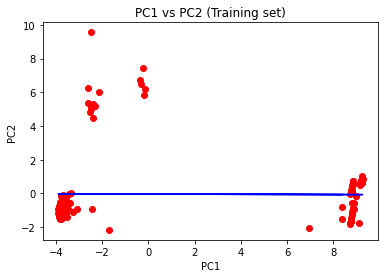

In [321]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

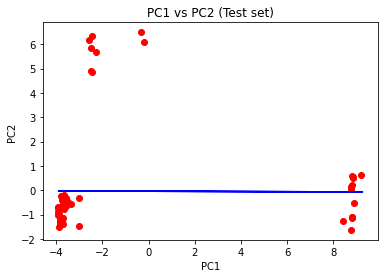

In [322]:
  # show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

## __5) Sampling__
Standardise all labels to have the same amount of columns and will be using neural network to test accuracy.

Explanation: <br>
Since the accuracy of neural network is lower that the dataset used for data mining. We will continue to use the merged dataset.

In [323]:
sampl = df_merge.groupby('Class', group_keys=False).apply(lambda x: x.sample(24)) 
sampl

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
157,1.18708,1.02954,1.02076,3.23333,3.74287,3.71966,3.07147,1483.73911,1486.24850,1485.24100,1484.86511,5266.19444,4994.69444,4968.84444,4955.65556,5142.30556,5174.22222,4034.08333,4300.10556,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13922,83.98598,120.39601,120.10914,120.42892,120.14354,84.04931,83.90386,1
16,1.08317,0.99828,1.00470,6.83361,7.36778,7.41333,6.81250,1484.65000,1484.75278,1484.76111,1484.60278,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3490.77778,3253.77778,3170.44444,3283.33333,3618.11111,3580.25000,3532.08333,3450.41667,0.50000,0.50000,0.20000,0.20000,1.40000,1.40000,-0.70000,-0.70000,124.47028,123.78694,152.05250,151.08500,151.99667,151.02667,124.57639,123.89083,1
43,1.08686,1.00545,0.99631,5.68806,6.20361,6.14944,5.67778,1483.82778,1483.91667,1483.95000,1483.75000,65.00000,65.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3714.50000,3517.97222,3282.19444,3390.16667,3692.55556,3661.00000,3500.36111,3402.22222,1.00000,1.00000,0.30000,0.30000,1.50000,1.50000,-1.00000,-1.00000,124.48000,123.91250,152.05833,151.24639,152.00139,151.18972,124.58833,124.01889,1
50,1.06609,0.99010,0.98750,7.28028,7.86278,7.84278,7.45167,1485.89722,1485.96389,1485.98611,1485.81389,65.00000,65.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3658.91667,3415.63889,3210.66667,3363.66667,3643.27778,3644.00000,3457.08333,3344.69444,1.00000,1.00000,0.30000,0.30000,1.50000,1.50000,-1.00000,-1.00000,124.38139,123.66472,151.95889,150.93083,151.90083,150.87417,124.49667,123.76972,1
22,1.09166,0.98930,0.99025,3.29778,3.63750,3.64083,3.36944,1485.72778,1485.83889,1485.85278,1485.68333,66.00000,66.00000,66.00000,66.00000,65.00000,65.00000,66.00000,66.00000,3587.58333,3478.66667,3309.83333,3397.88889,3545.00000,3514.88889,3655.80556,3617.58333,0.60000,0.60000,0.20000,0.20000,1.00000,1.00000,-0.70000,-0.70000,124.20472,123.87111,151.69306,151.21861,151.63639,151.16389,124.31056,123.97500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2.10809,1.87895,1.86603,6.21472,6.75472,6.72361,0.17889,1485.39167,1485.48333,1485.47222,1579.59167,66.00000,66.00000,66.00000,66.00000,66.00000,66.00000,55.00000,55.00000,3421.77778,3207.25000,3115.52778,3227.55556,3417.38889,3381.72222,1653.47222,1604.47222,0.30000,0.30000,-0.10000,-0.10000,0.90000,0.90000,44.40000,44.40000,124.37472,123.75750,151.93556,151.05167,151.88167,150.99528,116.77139,116.75278,4
132,2.07138,1.83384,1.82057,3.41333,3.73306,3.71472,0.18222,1483.71389,1483.83611,1483.84167,1610.52500,66.00000,66.00000,66.00000,66.00000,66.00000,66.00000,55.00000,55.00000,3461.58333,3346.25000,3203.38889,3257.77778,3480.47222,3450.83333,1580.80556,1694.13889,0.30000,0.30000,-0.10000,-0.10000,0.90000,0.90000,44.40000,44.40000,124.37361,124.03778,151.90361,151.41694,151.85028,151.35944,116.76972,113.07750,4
144,1.88084,1.83866,1.77367,3.67194,3.82722,3.73167,0.34694,1501.31667,1491.42500,1498.21944,1616.50278,57.00000,57.00000,61.00000,61.00000,56.00000,56.00000,55.00000,55.00000,3469.69444,2957.38889,3497.88889,3539.36111,2140.

In [324]:
from sklearn.model_selection import train_test_split

Y= sampl['Class']
X= sampl.drop(['Class'],axis=1)

# use this as main model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform pca on dataset 
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)




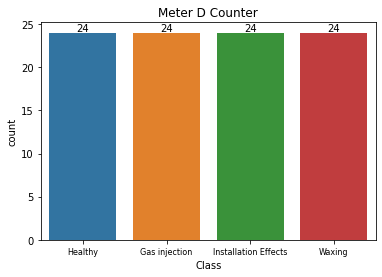

In [325]:
import seaborn as sns

ax = sns.countplot(x=sampl['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection', 'Installation Effects','Waxing'], fontsize=8) 
plt.title('Meter D Counter')
plt.show()

Model score: 0.72
Highest training accuracy: 1.0
Highest testing accuracy: 0.72
Lowest testing accuracy: 0.62


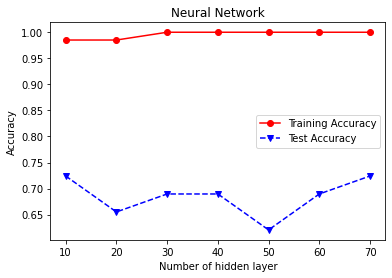

In [326]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=10000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
plt.title('Neural Network')

print (f"Model score: {round(clf6.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(trainAcc),2))
print("Highest testing accuracy:", round(max(testAcc),2))
print("Lowest testing accuracy:", round(min(testAcc),2))